In [129]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


data = pickle.load(open('result/config2_update_18000_random_full.pickle', 'rb'))
per, diff, send_nodes, success_nodes, real_field, constructed_field = data
random_para = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_para = per.shape[0]
repeat = per.shape[1]
steps = per.shape[2]


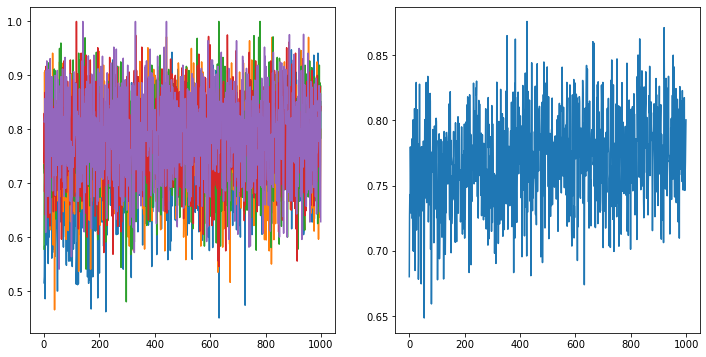

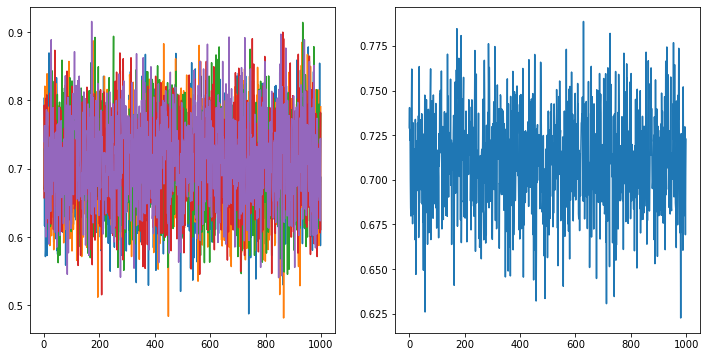

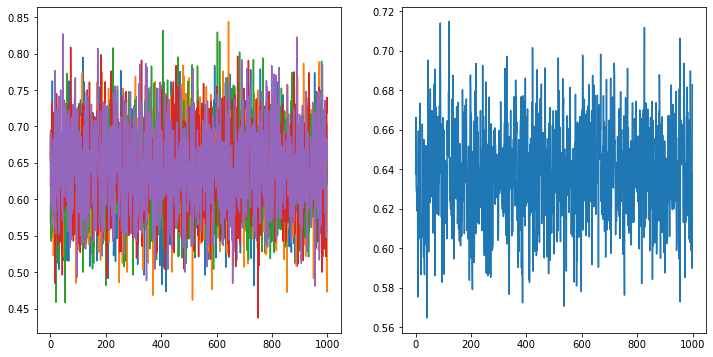

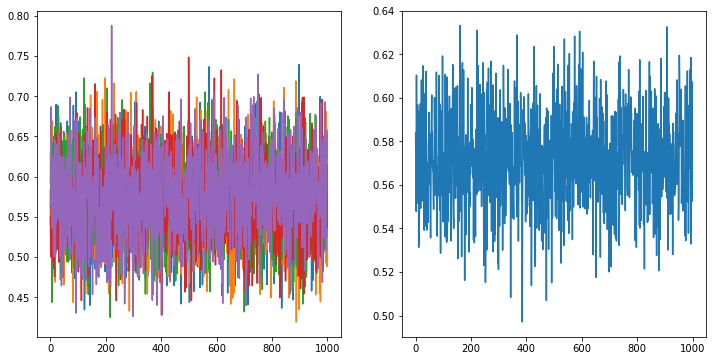

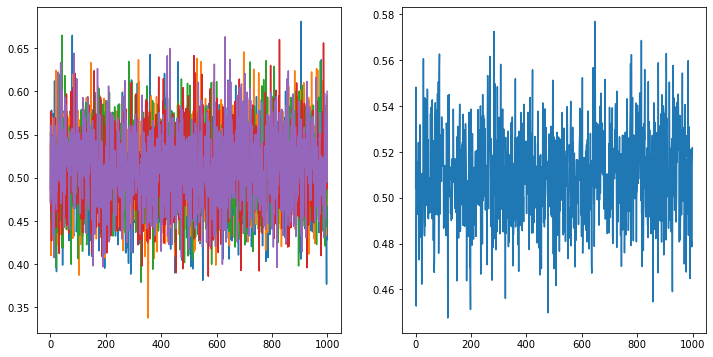

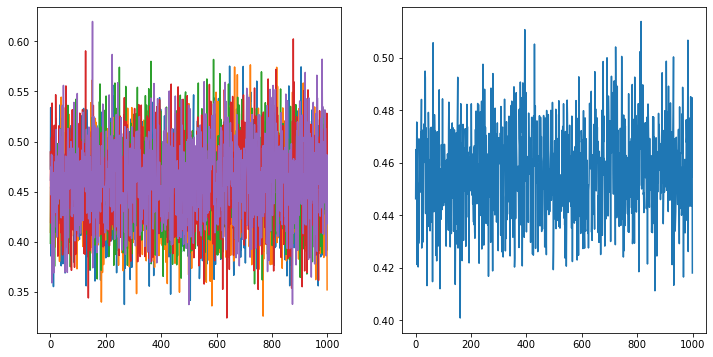

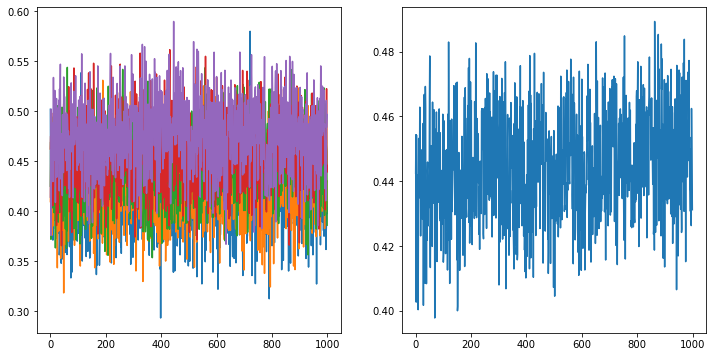

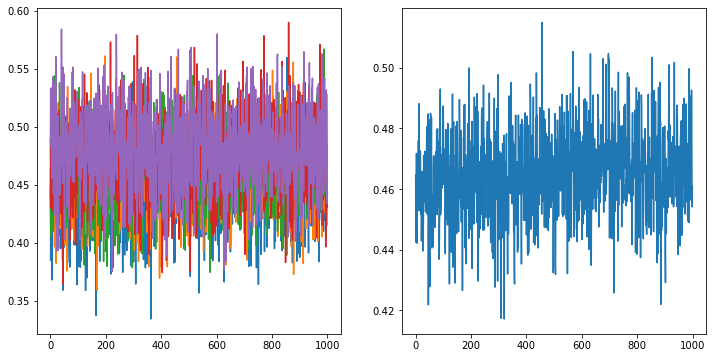

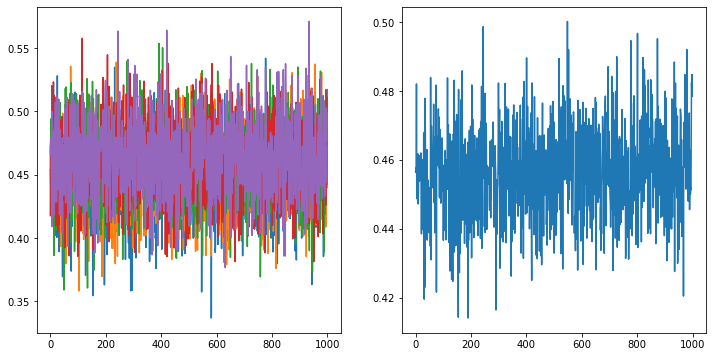

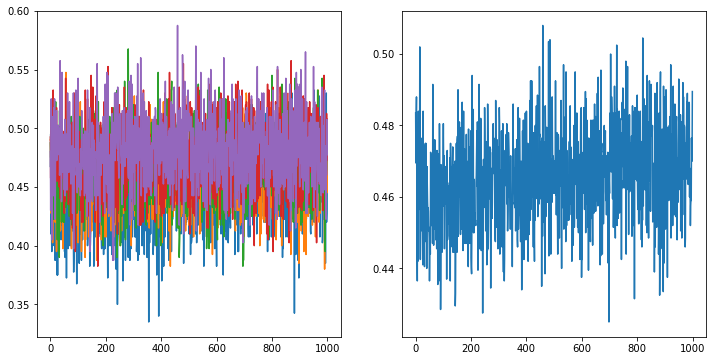

In [130]:

def plot_repeat(per):
    

    for i in range(n_para):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
        for j in range(repeat):
            ax1.plot(per[i,j,:])
        ax2.plot(np.average(per[i], axis=0))
    plt.show()

plot_repeat(per)

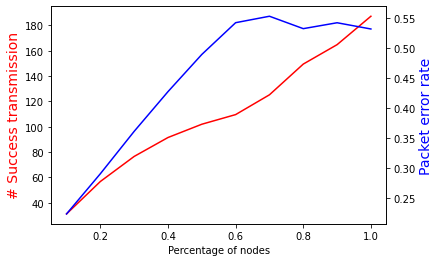

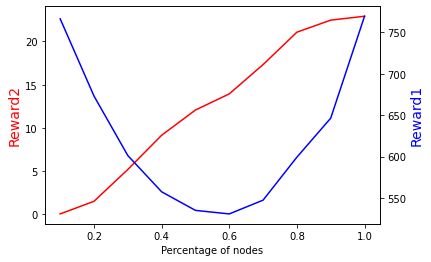

In [131]:
per_average = np.average(per, axis=1)
per_average = np.average(per_average[:,-500:], axis=1)

success = np.sum(np.absolute(success_nodes), axis=3)
success_average = np.average(success, axis=1)
success_average = np.average(success_average[:,-500:], axis=1)



reward1 = np.sum(np.absolute(diff), axis=3)
reward1_average = np.average(reward1, axis=1)
reward1_average = np.average(reward1_average[:,-500:], axis=1)

reward2 = np.zeros(per.shape)
for i in range(n_para):
    for j in range(repeat):
        for k in range(steps):
            idx = np.where(success_nodes[i,j,k] == 1)
            count = np.absolute(diff[i,j,k, idx])
            reward2[i,j,k] = np.sum(np.exp(-count))
reward2_average = np.average(reward2, axis=1)
reward2_average = np.average(reward2_average[:,-500:], axis=1)
            
ax = plt.subplot()
ax.plot(random_para, success_average, color="red")
ax.set_ylabel("# Success transmission",color="red",fontsize=14)
ax.set_xlabel("Percentage of nodes")
ax2=ax.twinx()
ax2.plot(random_para, 1 - per_average,color="blue")
ax2.set_ylabel("Packet error rate",color="blue",fontsize=14)
plt.show()

ax = plt.subplot()
ax.plot(random_para, reward2_average, color="red")
ax.set_ylabel("Reward2 of successful nodes",color="red",fontsize=14)
ax.set_xlabel("Percentage of nodes")
ax2=ax.twinx()
ax2.plot(random_para, reward1_average,color="blue")
ax2.set_ylabel("Reward1 of successful nodes",color="blue",fontsize=14)
plt.show()


In [128]:
from framework.utils import play_field_video

data = pickle.load(open('result/config4_update_18000_field_random_0.5.pkl', 'rb'))
Z, Tr = data
print(Tr)
play_field_video(Z, Tr)

ImportError: cannot import name 'play_field_video' from 'framework.utils' (/Users/hyii/Research/EmComm/simulations/LoRa-simulation/framework/utils.py)

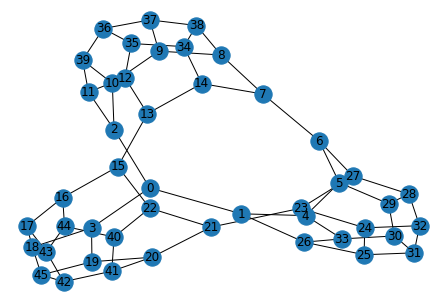

In [108]:
import networkx as nx

G = nx.tutte_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

{0: array([-477, -238]), 1: array([ 442, -661]), 2: array([-835,  712]), 3: array([-1353,   397]), 4: array([1093, -691]), 5: array([1431, -154]), 6: array([1228,  528]), 7: array([ 663, 1290]), 8: array([ 241, 1927]), 9: array([-385, 1990]), 10: array([-853, 1466]), 11: array([-1093,  1323]), 12: array([-725, 1556]), 13: array([-499,  971]), 14: array([  46, 1461]), 15: array([-797,  108]), 16: array([-1353,  -397]), 17: array([-1714,  -864]), 18: array([-1657, -1205]), 19: array([-1058, -1443]), 20: array([ -456, -1370]), 21: array([ 138, -879]), 22: array([-476, -569]), 23: array([1042, -572]), 24: array([1688, -890]), 25: array([ 1681, -1329]), 26: array([ 1078, -1124]), 27: array([1566,  -43]), 28: array([2133, -340]), 29: array([1929, -498]), 30: array([ 1987, -1023]), 31: array([ 2184, -1298]), 32: array([2240, -855]), 33: array([ 1461, -1070]), 34: array([-132, 2064]), 35: array([-662, 2115]), 36: array([-943, 2358]), 37: array([-476, 2500]), 38: array([  -6, 2408]), 39: array(

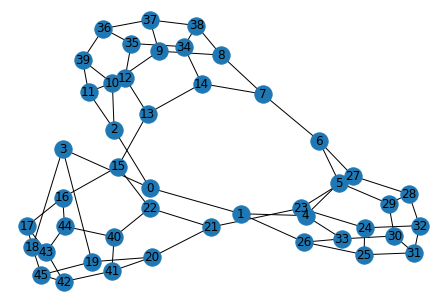

In [112]:
positions = (np.vstack( [pos[n] for n in pos]) * 2500).astype(int)
pos_modified = {i : positions[i] for i in G.nodes}
edges = G.edges
pos_modified[3] = np.array([-1353,  397])
print(pos_modified)
print(G.edges)
nx.draw(G, pos=pos_modified, with_labels=True)